In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [75]:
df = pd.read_csv('7817_1.csv')
df

id       asins   brand  \
0     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4     AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
...                    ...         ...     ...   
1592  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1593  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1594  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1595  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   
1596  AVpfo9ukilAPnD_xfhuj  B00NO8JJZW  Amazon   

                                             categories colors  \
0                            Amazon Devices,mazon.co.uk    NaN   
1                            Amazon Devices,mazon.co.uk    NaN   
2                            Amazon Devices,mazon.co.uk    NaN   
3                            Amazon Devices,mazon.co.uk    NaN   
4                            Amazon Devices,mazon.co.uk    NaN   
...                                                 ...    ...   
1592  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1593  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1594  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1595  Amazon Devices & Accessories,Amazon Device Acc...    NaN   
1596  Amazon Devices & Accessories,Amazon Device Acc...    NaN   

                 dateAdded           dateUpdated                 dimension  \
0     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
1     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
2     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
3     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
4     2016-03-08T20:21:53Z  2017-07-18T23:52:58Z  169 mm x 117 mm x 9.1 mm   
...                    ...                   ...                       ...   
1592  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1593  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1594  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1595  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   
1596  2016-04-02T14:40:43Z  2017-08-13T08:28:46Z                       NaN   

      ean                                               keys  ...  \
0     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
1     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
2     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
3     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
4     NaN                        kindlepaperwhite/b00qjdu3ky  ...   
...   ...                                                ...  ...   
1592  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1593  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1594  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1595  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   
1596  NaN  alexavoiceremoteforamazonfiretvfiretvstick/b00...  ...   

     reviews.rating                                 reviews.sourceURLs  \
0               5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
1               5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
2               4.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
3               5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
4               5.0  https://www.amazon.com/Kindle-Paperwhite-High-...   
...             ...                                                ...   
1592            3.0  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1593            1.0  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1594            1.0  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1595            3.0  https://www.amazon.com/Alexa-Voice-Remote-Amaz...   
1596            1.0  https://www.amazon.com/Alexa-

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [77]:
df.isnull().sum()

id                         0
asins                      0
brand                      0
categories                 0
colors                   823
dateAdded                  0
dateUpdated                0
dimension               1032
ean                      699
keys                       0
manufacturer             632
manufacturerNumber       695
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64

In [78]:
df[['reviews.date','reviews.doRecommend']]

reviews.date reviews.doRecommend
0     2015-08-08T00:00:00.000Z                 NaN
1     2015-09-01T00:00:00.000Z                 NaN
2     2015-07-20T00:00:00.000Z                 NaN
3     2017-06-16T00:00:00.000Z                 NaN
4     2016-08-11T00:00:00.000Z                 NaN
...                        ...                 ...
1592  2016-07-06T00:00:00.000Z                 NaN
1593  2016-06-22T00:00:00.000Z                 NaN
1594  2016-03-31T00:00:00.000Z                 NaN
1595      2016-04-26T00:00:00Z                 NaN
1596      2016-07-31T00:00:00Z                 NaN

[1597 rows x 2 columns]

In [79]:
df['reviews.text']

0       I initially had trouble deciding between the p...
1       Allow me to preface this with a little history...
2       I am enjoying it so far. Great for reading. Ha...
3       I bought one of the first Paperwhites and have...
4       I have to say upfront - I don't like coroporat...
                              ...                        
1592    This is not the same remote that I got for my ...
1593    I have had to change the batteries in this rem...
1594    Remote did not activate, nor did it connect to...
1595    It does the job but is super over priced. I fe...
1596    I ordered this item to replace the one that no...
Name: reviews.text, Length: 1597, dtype: object

In [80]:
df.drop(['colors','dimension','ean','manufacturer','manufacturerNumber','reviews.doRecommend','reviews.numHelpful','reviews.title','reviews.rating','reviews.userCity','reviews.userProvince','reviews.username','sizes','upc','weight'],axis=1,inplace=True)

0       2015.0
1       2015.0
2       2015.0
3       2017.0
4       2016.0
         ...  
1592    2016.0
1593    2016.0
1594    2016.0
1595    2016.0
1596    2016.0
Name: year, Length: 1597, dtype: float64


<AxesSubplot:xlabel='year', ylabel='count'>

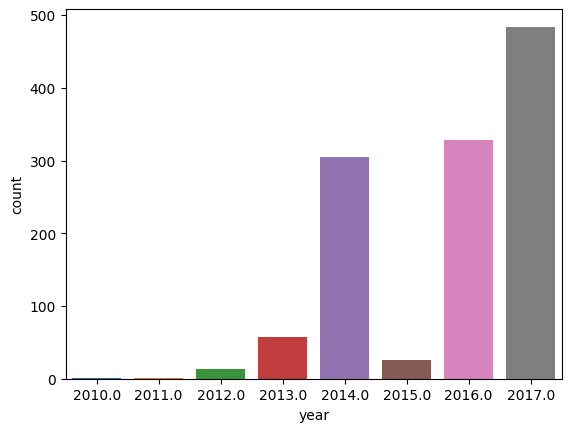

In [81]:
df['year'] = pd.DatetimeIndex(df['reviews.date']).year
print(df['year'])
sns.countplot(x ='year', data = df) 


<AxesSubplot:xlabel='month', ylabel='count'>

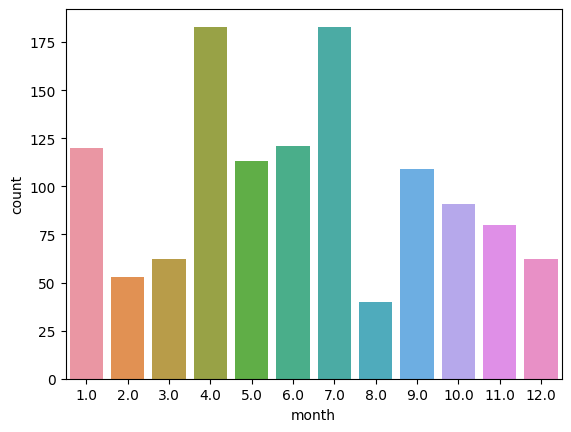

In [82]:
df['month'] = pd.DatetimeIndex(df['reviews.date']).month
sns.countplot(x ='month', data = df) 

In [83]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
df['reviews.text'].head()

0    I initially had trouble deciding between the p...
1    Allow me to preface this with a little history...
2    I am enjoying it so far. Great for reading. Ha...
3    I bought one of the first Paperwhites and have...
4    I have to say upfront - I don't like coroporat...
Name: reviews.text, dtype: object

In [85]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tanuj\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [86]:
sentence = df['reviews.text'][0]
sid.polarity_scores(sentence)['compound']

0.9804

In [87]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

df['tweet_clean'] = df['reviews.text'].apply(cleaner)

In [88]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

In [89]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [99]:
df = df[['reviews.text','reviews.date','id','sentiment','sentiment_category']]
df.tail(20)

reviews.text  \
1577  Purchased the replacement controll because the...   
1578  UPDATE: After 3 months of minimal use the remo...   
1579  These remotes are terrible and basically dispo...   
1580  Second remote. Stopped working. Will not work ...   
1581  My remote went out just a couple weeks after w...   
1582  Product is what it is: if you're like me and m...   
1583  Remote didn't work, did all the troubleshootin...   
1584  Update 12/26/2016: No longer will pair with 2n...   
1585  My fire stick (non voice activated) seemed to ...   
1586  All in all I love this remote! It's pretty sma...   
1587  I am now having to order my third remote becau...   
1588  Don't bother paying for one or getting a repla...   
1589  I've had the REPLACEMENT remote 3 months and i...   
1590  Voice remote gave out nearly a year after I pu...   
1591  Purchased my first one with the TV Fire box ov...   
1592  This is not the same remote that I got for my ...   
1593  I have had to change the batteries in this rem...   
1594  Remote did not activate, nor did it connect to...   
1595  It does the job but is super over priced. I fe...   
1596  I ordered this item to replace the one that no...   

                  reviews.date                    id  sentiment  \
1577  2017-02-17T00:00:00.000Z  AVpfODXeilAPnD_xXeUd     0.7184   
1578  2017-02-22T00:00:00.000Z  AVpfODXeilAPnD_xXeUd     0.7096   
1579  2017-05-08T00:00:00.000Z  AVpfODXeilAPnD_xXeUd    -0.3612   
1580  2017-01-25T00:00:00.000Z  AVpfODXeilAPnD_xXeUd    -0.6359   
1581  2016-02-02T00:00:00.000Z  AVpfODXeilAPnD_xXeUd     0.4738   
1582                       NaN  AVpfODXeilAPnD_xXeUd    -0.2577   
1583  2016-02-22T00:00:00.000Z  AVpfODXeilAPnD_xXeUd    -0.5256   
1584  2016-09-18T00:00:00.000Z  AVpfODXeilAPnD_xXeUd     0.6036   
1585  2016-03-17T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj     0.5859   
1586  2016-08-19T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.8825   
1587  2016-03-11T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj     0.6369   
1588                       NaN  AVpfo9ukilAPnD_xfhuj     0.7109   
1589                       NaN  AVpfo9ukilAPnD_xfhuj     0.2960   
1590  2016-03-21T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.2500   
1591                       NaN  AVpfo9ukilAPnD_xfhuj     0.1655   
1592  2016-07-06T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.7887   
1593  2016-06-22T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.9346   
1594  2016-03-31T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.7430   
1595      2016-04-26T00:00:00Z  AVpfo9ukilAPnD_xfhuj     0.8271   
1596      2016-07-31T00:00:00Z  AVpfo9ukilAPnD_xfhuj    -0.8838   

     sentiment_category  
1577           positive  
1578           positive  
1579           negative  
1580           negative  
1581           positive  
1582           negative  
1583           negative  
1584           positive  
1585           positive  
1586           negative  
1587           positive  
1588           positive  
1589           positive  
1590           negative  
1591           positive  
1592           negative  
1593           negative  
1594           negative  
1595           positive  
1596           negative

In [91]:
neg = df[df['sentiment_category']=='negative']
neg = neg.groupby(['reviews.date'],as_index=False).count()

pos = df[df['sentiment_category']=='positive']
pos = pos.groupby(['reviews.date'],as_index=False).count()

pos = pos[['reviews.date','id']]
neg = neg[['reviews.date','id']]

In [92]:
import plotly.graph_objs as go

fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['reviews.date'], y=pos['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )

for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['reviews.date'], y=neg['id'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [94]:
df[df['sentiment_category']=='positive']

reviews.text  \
0     I initially had trouble deciding between the p...   
1     Allow me to preface this with a little history...   
2     I am enjoying it so far. Great for reading. Ha...   
3     I bought one of the first Paperwhites and have...   
4     I have to say upfront - I don't like coroporat...   
...                                                 ...   
1587  I am now having to order my third remote becau...   
1588  Don't bother paying for one or getting a repla...   
1589  I've had the REPLACEMENT remote 3 months and i...   
1591  Purchased my first one with the TV Fire box ov...   
1595  It does the job but is super over priced. I fe...   

                  reviews.date                    id  sentiment  \
0     2015-08-08T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G     0.9760   
1     2015-09-01T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G     0.9889   
2     2015-07-20T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G     0.4364   
3     2017-06-16T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G     0.9512   
4     2016-08-11T00:00:00.000Z  AVpe7AsMilAPnD_xQ78G     0.9946   
...                        ...                   ...        ...   
1587  2016-03-11T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj     0.6369   
1588                       NaN  AVpfo9ukilAPnD_xfhuj     0.7109   
1589                       NaN  AVpfo9ukilAPnD_xfhuj     0.2960   
1591                       NaN  AVpfo9ukilAPnD_xfhuj     0.1655   
1595      2016-04-26T00:00:00Z  AVpfo9ukilAPnD_xfhuj     0.8271   

     sentiment_category  
0              positive  
1              positive  
2              positive  
3              positive  
4              positive  
...                 ...  
1587           positive  
1588           positive  
1589           positive  
1591           positive  
1595           positive  

[1416 rows x 5 columns]

In [95]:
df[df['sentiment_category']=='negative']

reviews.text  \
44    I got my Kindle a few years ago and barely use...   
96    Major fan, didn't buy this because of protecti...   
107   Simply put, this is the Amazons iPad Air Kille...   
108   After 15 months, my 500+ tablet is no longer u...   
110   Simply put, this is the Amazons iPad Air Kille...   
...                                                 ...   
1590  Voice remote gave out nearly a year after I pu...   
1592  This is not the same remote that I got for my ...   
1593  I have had to change the batteries in this rem...   
1594  Remote did not activate, nor did it connect to...   
1596  I ordered this item to replace the one that no...   

                  reviews.date                    id  sentiment  \
44        2014-05-06T05:00:00Z  AVpfBEWcilAPnD_xTGb7    -0.8226   
96    2016-11-28T00:00:00.000Z  AV00lzP7GV-KLJ3ac0uk    -0.1603   
107   2013-11-07T00:00:00.000Z  AVpfpzCi1cnluZ0-oxEr    -0.9442   
108   2015-03-15T00:00:00.000Z  AVpfpzCi1cnluZ0-oxEr    -0.4939   
110       2013-11-07T00:00:00Z  AVpfpzCi1cnluZ0-oxEr    -0.9442   
...                        ...                   ...        ...   
1590  2016-03-21T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.2500   
1592  2016-07-06T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.7887   
1593  2016-06-22T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.9346   
1594  2016-03-31T00:00:00.000Z  AVpfo9ukilAPnD_xfhuj    -0.7430   
1596      2016-07-31T00:00:00Z  AVpfo9ukilAPnD_xfhuj    -0.8838   

     sentiment_category  
44             negative  
96             negative  
107            negative  
108            negative  
110            negative  
...                 ...  
1590           negative  
1592           negative  
1593           negative  
1594           negative  
1596           negative  

[125 rows x 5 columns]